In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


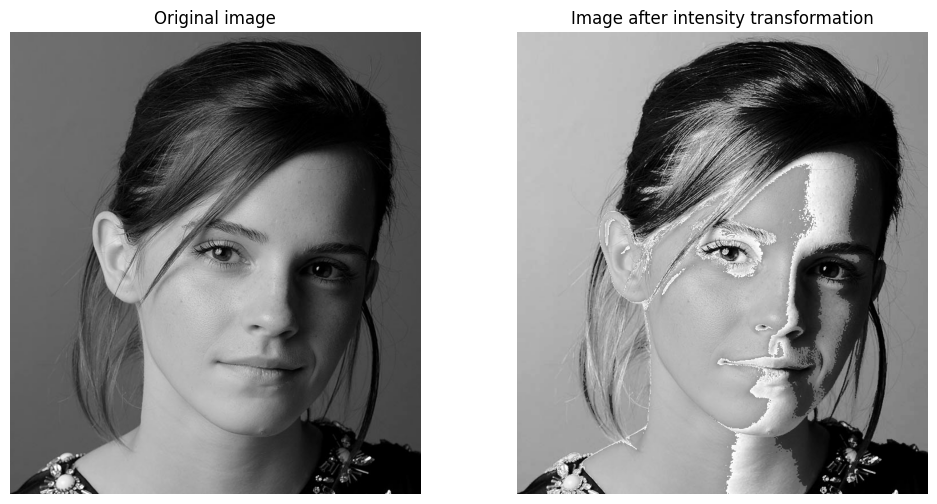

In [192]:
r = np.array([(50,100,150,255),(0,50,150,255)])
t1=np.linspace(0,r[0,0],r[1,1]).astype('uint8')
t2=np.linspace(r[0,1],r[0,3],r[1,2]-r[1,1]).astype('uint8')
t3=np.linspace(r[0,2],r[0,3],r[1,3]-r[1,2]+1).astype('uint8')
transform =np.concatenate((t1,t2,t3),axis=0).astype('uint8')

img = cv.imread('a1images/emma.jpg',cv.IMREAD_GRAYSCALE)
img_t=cv.LUT(img,transform)
img_tranformed = cv.cvtColor(img_t, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off') 
plt.subplot(1,2,2)
plt.title("Image after intensity transformation")
plt.imshow(img_tranformed)
plt.axis('off') 
plt.show()

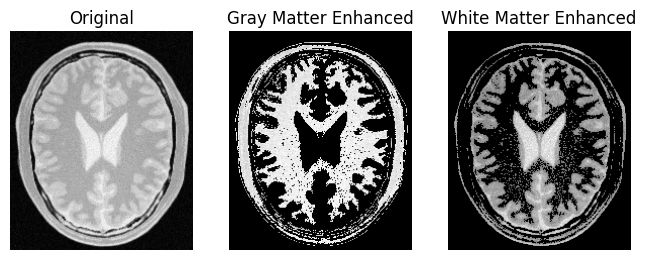

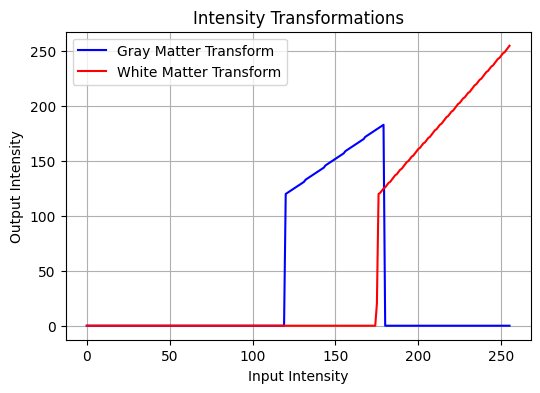

In [194]:
r_gray = np.array([
    (0,   120, 185, 0),   # Output intensities
    (0, 120, 180, 255) ])
r_white = np.array([        # Intensity window to enhance white matter
    (0,   20, 120, 255),   # output intensities
    (0,175, 176, 255) ])
def get_transform(r):
    t1 = np.linspace(0, r[0, 0], r[1, 1], endpoint=False).astype('uint8')
    t2 = np.linspace(r[0, 1], r[0, 2], r[1, 2] - r[1, 1], endpoint=False).astype('uint8')
    t3 = np.linspace(r[0, 2], r[0, 3], r[1, 3] - r[1, 2] + 1).astype('uint8')
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    return transform
def get_transformg(r):
    t1 = np.linspace(0, r[0, 0], r[1, 1], endpoint=False).astype('uint8')
    t2 = np.linspace(r[0, 1], r[0, 2], r[1, 2] - r[1, 1], endpoint=False).astype('uint8')
    t3 = np.linspace(0, r[0, 3], r[1, 3] - r[1, 2] + 1).astype('uint8')
    transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    return transform
img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
gray_transform = get_transformg(r_gray)
white_transform = get_transform(r_white)
gray_enhanced = cv.LUT(img, gray_transform)
white_enhanced = cv.LUT(img, white_transform)

# Show result
plt.figure(figsize=(8,6))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Gray Matter Enhanced")
plt.imshow(gray_enhanced, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("White Matter Enhanced")
plt.imshow(white_enhanced, cmap='gray')
plt.axis('off')
# Plot intensity transformation curves
plt.figure(figsize=(6, 4))
plt.plot(gray_transform, label='Gray Matter Transform', color='blue')
plt.plot(white_transform, label='White Matter Transform', color='red')
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.title("Intensity Transformations")
plt.legend()
plt.grid(True)
plt.show()

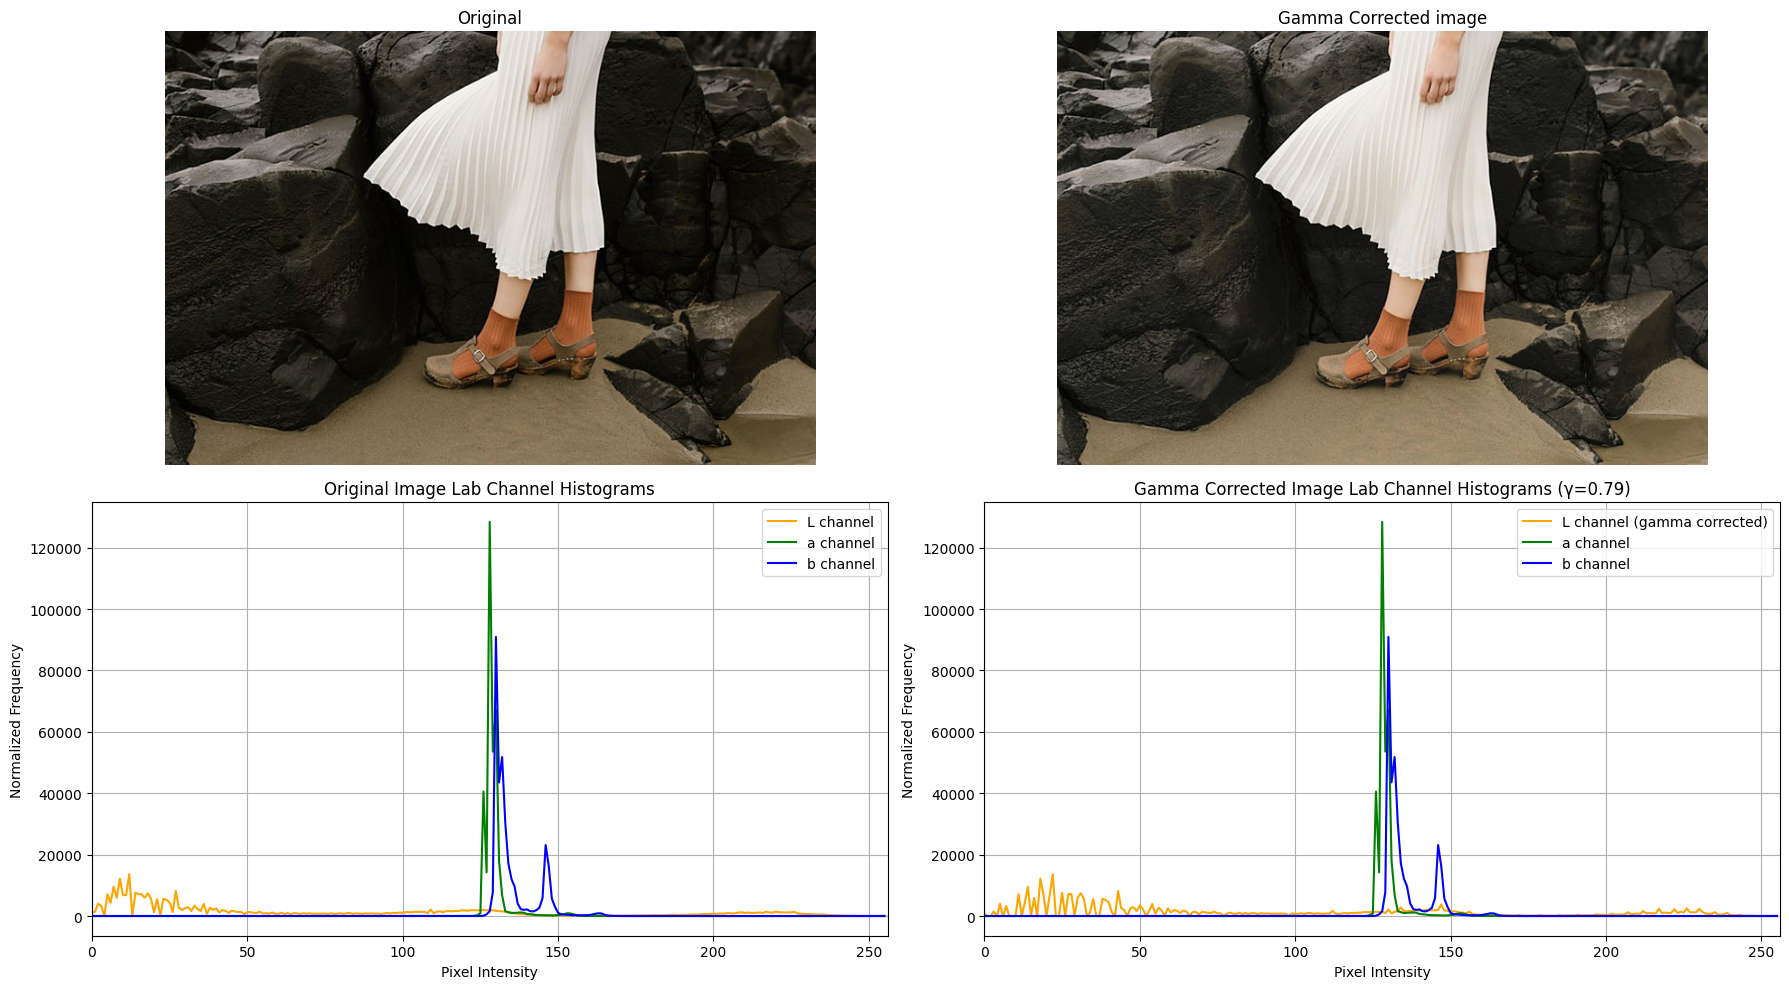

In [195]:
IMG= cv.imread("a1images/highlights_and_shadows.jpg",cv.COLOR_RGB2BGR)
org_img=cv.cvtColor(IMG,cv.COLOR_RGB2BGR)
img_lab = cv.cvtColor(IMG, cv.COLOR_BGR2Lab)
l_channel, a_channel, b_channel = cv.split(img_lab)
gamma = 0.79        # Gamma correction on L channel only
t = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(256)]).astype('uint8')
gamma_corrected_l = cv.LUT(l_channel, t)
img_gamma_lab = cv.merge((gamma_corrected_l, a_channel, b_channel))  # Merge gamma corrected L with original a and b channels
img_tranformed = cv.cvtColor(img_gamma_lab, cv.COLOR_Lab2BGR)
img_rgb = cv.cvtColor(img_tranformed, cv.COLOR_RGB2BGR)
def calc_norm_hist(channel):   # Function to calculate normalized histogram for a channel
    hist = cv.calcHist([channel], [0], None, [256], [0,256])
    return hist
hist_l_orig = calc_norm_hist(l_channel)   # Calculate histograms for original channels
hist_a_orig = calc_norm_hist(a_channel)
hist_b_orig = calc_norm_hist(b_channel)

hist_l_gamma = calc_norm_hist(gamma_corrected_l) # Calculate histograms for gamma corrected channels
hist_a_gamma = calc_norm_hist(a_channel)  # unchanged
hist_b_gamma = calc_norm_hist(b_channel)  # unchanged

# Plotting
plt.figure(figsize=(18,10))
plt.subplot(2, 2, 1)
plt.title("Original")


plt.imshow(org_img)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title("Gamma Corrected image")
plt.axis('off')
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis ticks
# Original image histograms
plt.subplot(2, 2, 3)
plt.plot(hist_l_orig, color='orange', label='L channel')
plt.plot(hist_a_orig, color='green', label='a channel')
plt.plot(hist_b_orig, color='blue', label='b channel')
plt.title('Original Image Lab Channel Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.xlim([0, 256])
plt.grid(True)

# Gamma corrected image histograms
plt.subplot(2, 2, 4)
plt.plot(hist_l_gamma, color='orange', label='L channel (gamma corrected)')
plt.plot(hist_a_gamma, color='green', label='a channel')
plt.plot(hist_b_gamma, color='blue', label='b channel')
plt.title(f'Gamma Corrected Image Lab Channel Histograms (γ={gamma})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()

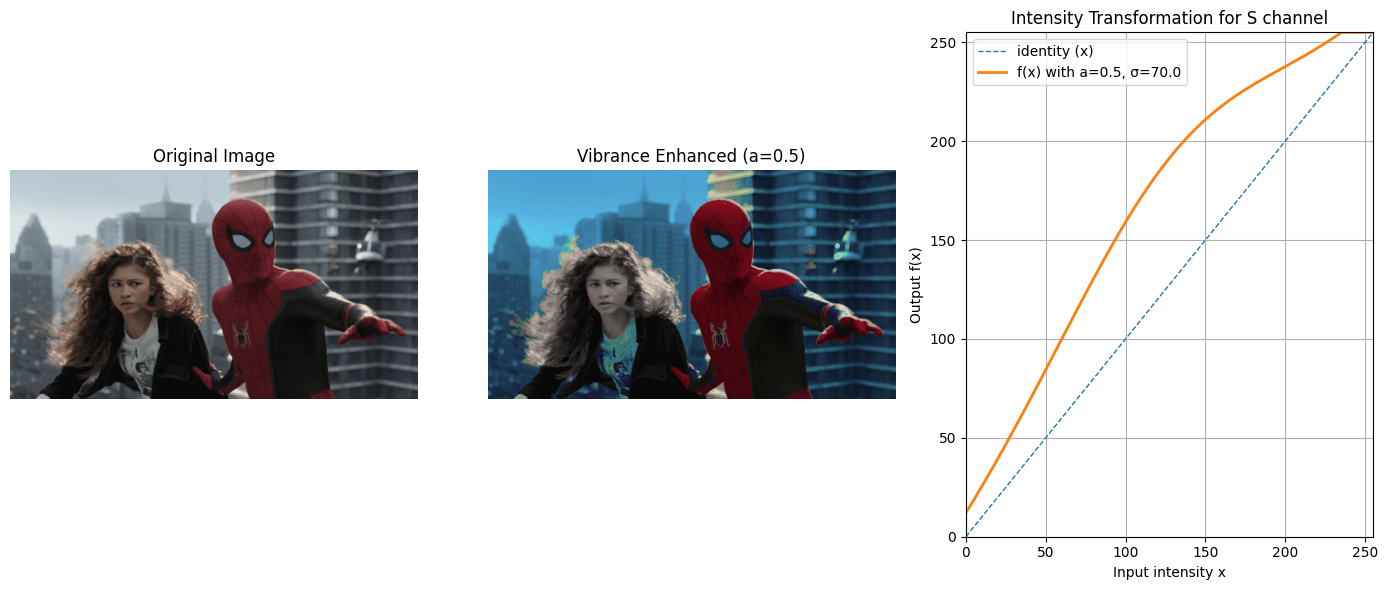

<Figure size 1000x400 with 0 Axes>

In [133]:
# ===== Parameters =====
img_path = "a1images/spider.png"   # <-- replace with your image path
sigma = 70.0
a = 0.5                      # <-- chosen value of a (report this)
img_bgr = cv.imread(img_path)
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

xs = np.arange(256).astype(np.float32)
f_x = xs + a * 128.0 * np.exp(-((xs - 128.0) ** 2) / (2.0 * (sigma ** 2)))
f_x = np.minimum(f_x, 255.0)
lut = np.round(f_x).astype(np.uint8)  # lookup table
s_trans = cv.LUT(h, lut)
img_hsv_trans = cv.merge((h, s_trans, v))

# Convert transformed HSV back to RGB for display
img_bgr_trans = cv.cvtColor(img_hsv_trans, cv.COLOR_HSV2BGR)
img_rgb_trans = cv.cvtColor(img_bgr_trans, cv.COLOR_BGR2RGB)

# Plot original image, enhanced image, and the transform curve
plt.figure(figsize=(14,6))

# Original image
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

# Enhanced image
plt.subplot(1,3,2)
plt.imshow(img_rgb_trans)
plt.title(f"Vibrance Enhanced (a={a})")
plt.axis("off")

# Plot intensity transformation (curve)
plt.subplot(1,3,3)
plt.plot(xs, xs, linestyle='--', label='identity (x)', linewidth=1)
plt.plot(xs, f_x, label=f'f(x) with a={a}, σ={sigma}', linewidth=2)
plt.title("Intensity Transformation for S channel")
plt.xlabel("Input intensity x")
plt.ylabel("Output f(x)")
plt.xlim([0,255])
plt.ylim([0,255])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: display S-channel histograms before & after
plt.figure(figsize=(10,4))
hist_s_orig = cv.calcHist([s], [0], None, [256], [0,256]).ravel()
hist_s_trans = cv.calcHist([s_trans], [0], None, [256], [0,256]).ravel()
hist_s_orig_norm = hist_s_orig / hist_s_orig.max()
hist_s_trans_norm = hist_s_trans / hist_s_trans.max()
plt.show()



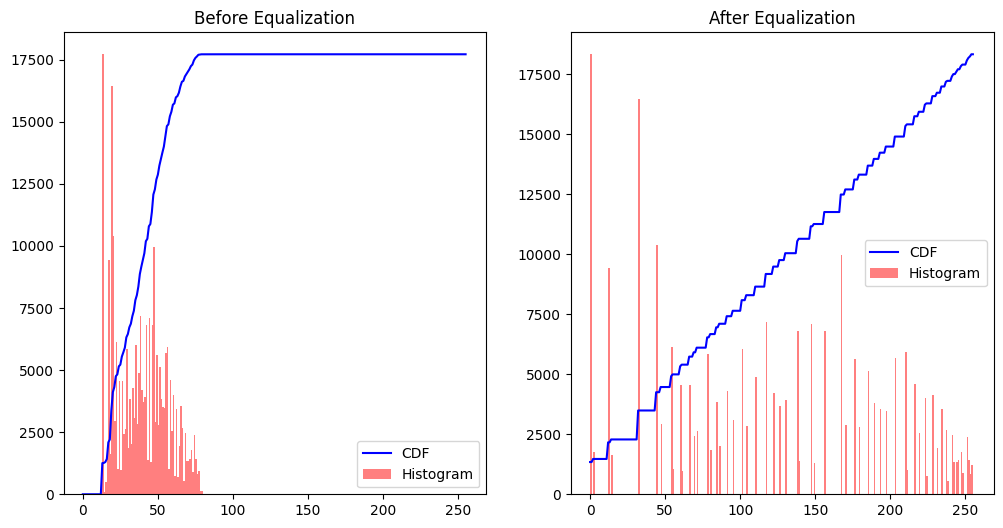

In [134]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Flatten the image
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    # Compute the CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()  # For visualization
    # Histogram Equalization transformation
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask pixels with zero count
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
    # Map original gray levels to equalized values
    img_eq = cdf_final[image]
    return img_eq, hist, cdf, cdf_normalized

img = cv2.imread('a1images/shells.tif', cv2.IMREAD_GRAYSCALE)

img_eq, hist_before, cdf_before, cdf_norm_before = histogram_equalization(img)
_, hist_after, cdf_after, cdf_norm_after = histogram_equalization(img_eq)

# Plot histograms and CDF before equalization
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Before Equalization')
plt.plot(cdf_norm_before, color='b', label='CDF')
plt.hist(img.flatten(), bins=256, range=[0,256], color='r', alpha=0.5, label='Histogram')
plt.legend()

# Plot histograms and CDF after equalization
plt.subplot(1,2,2)
plt.title('After Equalization')
plt.plot(cdf_norm_after, color='b', label='CDF')
plt.hist(img_eq.flatten(), bins=256, range=[0,256], color='r', alpha=0.5, label='Histogram')
plt.legend()

plt.show()


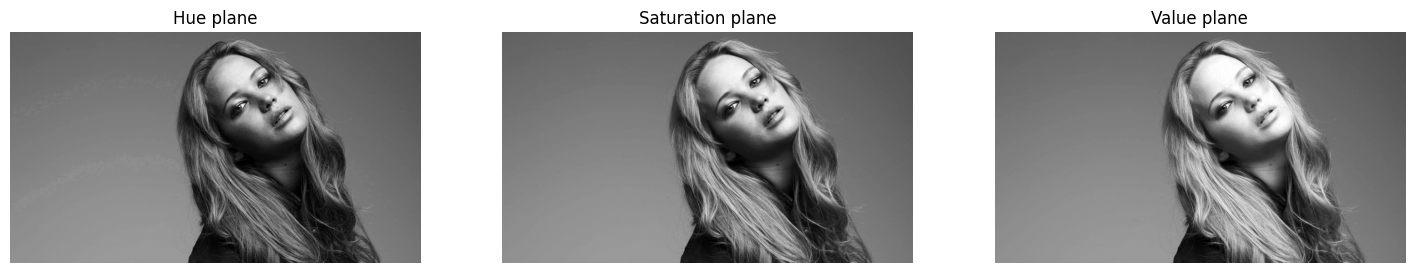

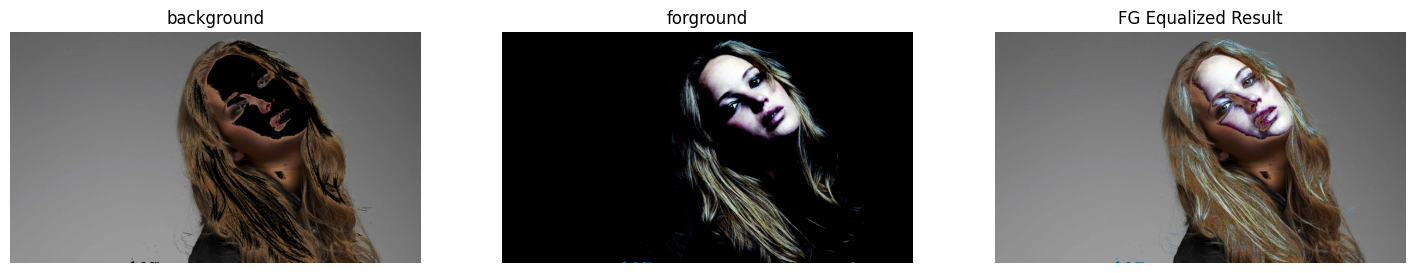

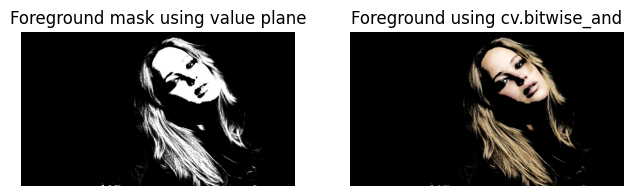

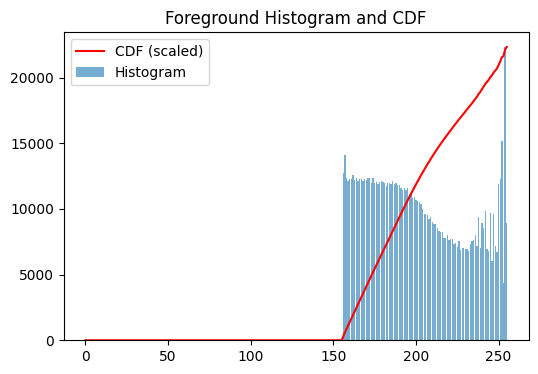

In [200]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread("a1images/jeniffer.jpg")
img_hsv=cv.cvtColor(img,cv.COLOR_BGR2HSV)
h_channel,s_channel,v_channel = cv.split(img)
threshold = 155

ret1,thres1=cv.threshold(h_channel,threshold,255,cv.THRESH_BINARY)
ret2,thres2=cv.threshold(s_channel,threshold,255,cv.THRESH_BINARY)
ret3,thres3=cv.threshold(v_channel,threshold,255,cv.THRESH_BINARY)

foreground = cv2.bitwise_and(img, img, mask=thres3)
foregroundrgb= cv.cvtColor(foreground,cv.COLOR_BGR2RGB)
fg_pixels = v_channel[thres3 == 255]   # Extract foreground values from V-channel
hist, _ = np.histogram(fg_pixels, bins=256, range=(0,256))
cdf = np.cumsum(hist)
background=cv.bitwise_and(img,img,mask=cv.bitwise_not(thres3))
backgroundrgb=cv.cvtColor(background,cv.COLOR_BGR2RGB)
# Normalize for plotting
cdf_norm = cdf / cdf.max()
L = 256
cdf_min = cdf[cdf > 0].min()
N = cdf.max()
lut = np.round((cdf - cdf_min) / (N - cdf_min) * (L - 1)).astype(np.uint8)
H_equlaized =cv.equalizeHist(foreground[:,:,0])
S_equlaized =cv.equalizeHist(foreground[:,:,1])
V_equlaized =cv.equalizeHist(foreground[:,:,2])
hsv_eq = cv2.merge([H_equlaized, S_equlaized, V_equlaized])
final_img=cv.add(hsv_eq,background)
#result_rgb = cv2.cvtColor(final_img, cv2.COLOR_HSV2RGB)
# ---------------- Display all outputs ----------------
plt.figure(figsize=(18,12))
plt.subplot(1,3,1); plt.imshow(h_channel, cmap='gray'); plt.title('Hue plane'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(s_channel, cmap='gray'); plt.title('Saturation plane'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(v_channel, cmap='gray'); plt.title('Value plane'); plt.axis('off')
plt.figure(figsize=(18,12))
plt.subplot(1,3,1); plt.imshow(backgroundrgb); plt.title('background'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(hsv_eq, cv2.COLOR_BGR2RGB)); plt.title('forground'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)); plt.title('FG Equalized Result'); plt.axis('off')

plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
plt.imshow(thres3,cmap='gray'); plt.title('Foreground mask using value plane'); plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(foregroundrgb); plt.title('Foreground using cv.bitwise_and'); plt.axis('off')

plt.figure(figsize=(6,4))
plt.bar(range(256), hist, alpha=0.6, label='Histogram')
plt.plot(range(256), cdf_norm * hist.max(), color='red', label='CDF (scaled)')
plt.legend()
plt.title('Foreground Histogram and CDF')
plt.show()


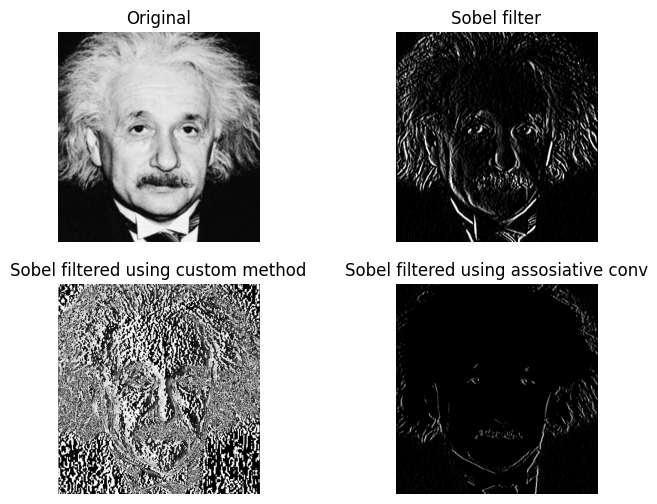

In [202]:
img = cv.imread("a1images/einstein.png", cv2.IMREAD_GRAYSCALE)
sobel_x = np.array([[-1,0,1], [-2,0,2],[-1,0,1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1],[ 0,  0,  0],[ 1,  2,  1]], dtype=np.float32)

grad_x = cv.filter2D(img, -1, sobel_x)
grad_y = cv.filter2D(img, -1, sobel_y)
kx = np.array([1, 0, -1], dtype=np.float32)   # horizontal
ky = np.array([1, 2, 1], dtype=np.float32)    # vertical
def convolve1d(image, kernel, axis):
    pad = len(kernel) // 2
    h, w = image.shape
    out = np.zeros_like(image)

    if axis == 0:  # vertical convolution
        padded = np.pad(image, ((pad, pad), (0, 0)), mode='constant')
        for i in range(h):
            for j in range(w):
                out[i, j] = np.dot(padded[i:i+len(kernel), j], kernel)

    else:  # horizontal convolution
        padded = np.pad(image, ((0, 0), (pad, pad)), mode='constant')
        for i in range(h):
            for j in range(w):
                out[i, j] = np.dot(padded[i, j:j+len(kernel)], kernel)

    return out
gx_sep = convolve1d(img, kx, axis=1)  # horizontal filter
gx_sep = convolve1d(gx_sep, ky, axis=0)  # vertical filter 

kx = np.array([1, 0, -1], dtype=np.float32)   # horizontal
ky = np.array([1, 2, 1], dtype=np.float32)    # vertical

kernel_h = kx.reshape(1, -1)  # shape (1, 3)
kernel_v = ky.reshape(-1, 1)  # shape (3, 1)
vertical_filtered = cv.filter2D(img, -1, kernel_v)
sobel = cv.filter2D(vertical_filtered, -1, kernel_h)

plt.figure(figsize=(8,6))
plt.subplot(2,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(grad_x, cmap='gray'); plt.title("Sobel filter"); plt.axis("off")
#plt.subplot(2,2,3); plt.imshow(grad_y, cmap='gray'); plt.title("Sobel Y"); plt.axis("off")
plt.subplot(2,2,3);plt.imshow(gx_sep, cmap='gray'); plt.title("Sobel filtered using custom method"); plt.axis("off")
plt.subplot(2,2,4);plt.imshow(sobel, cmap='gray'); plt.title("Sobel filtered using assosiative conv"); plt.axis("off")
plt.show()


zooming factor: 5
shape of original image : (112, 200, 3)
shape ofzoomed image    : (560, 1000, 3)
normalized SSD for nearest-neighbor       : 0.1697
normalized SSD for bilinear interpolation : 0.1695


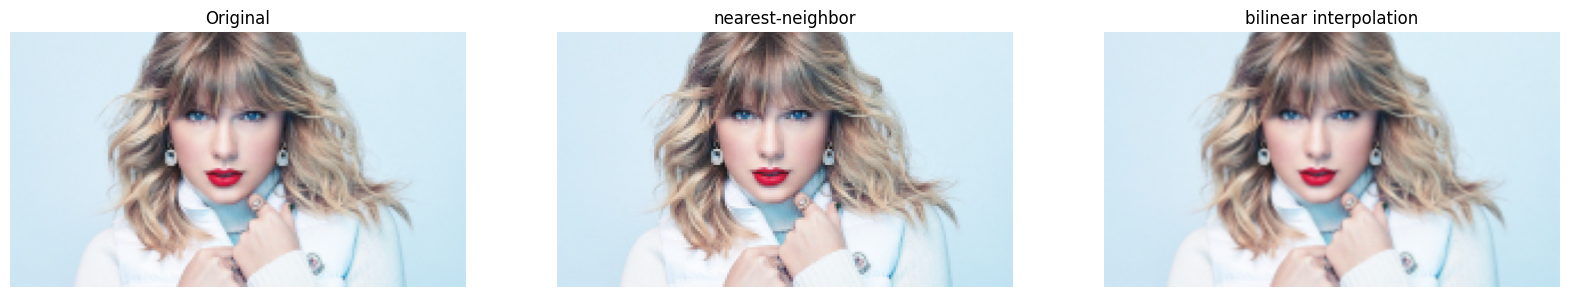

In [ ]:
import cv2
import numpy as np

def zoom_image_nearest(image, zoom_factor):
    h, w = image.shape[:2]
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)

    zoomed = np.zeros((new_h, new_w, *image.shape[2:]), dtype=image.dtype) if image.ndim == 3 else np.zeros((new_h, new_w), dtype=image.dtype)

    for i in range(new_h):
        for j in range(new_w):
            # Map pixel (i, j) in zoomed image back to original image coordinates
            orig_y = i / zoom_factor
            orig_x = j / zoom_factor
                # Nearest neighbor: round to nearest pixel
            nearest_y = min(int(round(orig_y)), h - 1)
            nearest_x = min(int(round(orig_x)), w - 1)
            zoomed[i, j] = image[nearest_y, nearest_x]
    return zoomed

def zoom_image_bilinear(image, zoom_factor):
    h, w = image.shape[:2]
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)
    zoomed = np.zeros((new_h, new_w, *image.shape[2:]), dtype=image.dtype) if image.ndim == 3 else np.zeros((new_h, new_w), dtype=image.dtype)
    for i in range(new_h):
        for j in range(new_w): 
            orig_y = i / zoom_factor
            orig_x = j / zoom_factor
            y0 = int(np.floor(orig_y))
            x0 = int(np.floor(orig_x))
            y1 = min(y0 + 1, h - 1)
            x1 = min(x0 + 1, w - 1)

            dy = orig_y - y0
            dx = orig_x - x0
            top_left = image[y0, x0].astype(np.float32)
            top_right = image[y0, x1].astype(np.float32)
            bottom_left = image[y1, x0].astype(np.float32)
            bottom_right = image[y1, x1].astype(np.float32)

            top = top_left * (1 - dx) + top_right * dx
            bottom = bottom_left * (1 - dx) + bottom_right * dx
            pixel = top * (1 - dy) + bottom * dy
            zoomed[i, j] =pixel     
    return zoomed

def nssd(img1, img2):
    # Calculate the sum of squared difference
    ssd=np.sum((img1 - img2)**2)
    return ssd/(np.sum(img1**2)+np.sum(img2**2))

img = cv2.imread('a1images/a1q5images/taylor_small.jpg')  # Read a color image
img1=cv2.imread('a1images/a1q5images/taylor.jpg')

factor = 5
zoomed_nn = zoom_image_nearest(img, factor)
zoomed_bilinear = zoom_image_bilinear(img, factor)
print('zooming factor:',factor)
print('shape of original image :',img.shape)
print('shape ofzoomed image    :',zoomed_nn.shape)
print('normalized SSD for nearest-neighbor       :',round(nssd(img1,zoomed_nn),4))
print('normalized SSD for bilinear interpolation :',round(nssd(img1,zoomed_bilinear),4))

plt.figure(figsize=(20,15))
plt.subplot(1,3,1);plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2);plt.imshow(cv.cvtColor(zoomed_nn,cv.COLOR_BGR2RGB)); plt.title("nearest-neighbor"); plt.axis("off")
plt.subplot(1,3,3);plt.imshow(cv.cvtColor(zoomed_bilinear,cv.COLOR_BGR2RGB)); plt.title("bilinear interpolation"); plt.axis("off")
plt.show()


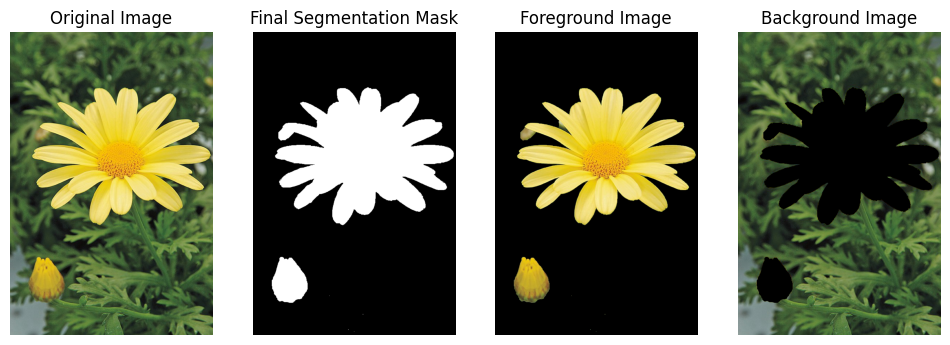

In [ ]:
img = cv.imread('a1images/daisy.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) 
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64) 
fgdModel = np.zeros((1, 65), np.float64) 

rect = (50, 50, img.shape[1]-50, img.shape[0]-50)
cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
final_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

foreground = img * final_mask[:, :, np.newaxis]
background = img * (1 - final_mask[:, :, np.newaxis])

blurred_background = cv.GaussianBlur(background, (11,11),0)
enhanced_img = foreground + blurred_background

plt.figure(figsize=(12,10))
plt.subplot(1,4,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')
plt.subplot(1,4,2)
plt.title('Final Segmentation Mask')
plt.imshow(final_mask, cmap='gray')
plt.axis('off')
plt.subplot(1,4,3)
plt.title('Foreground Image')
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,4,4)
plt.title('Background Image')
plt.imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


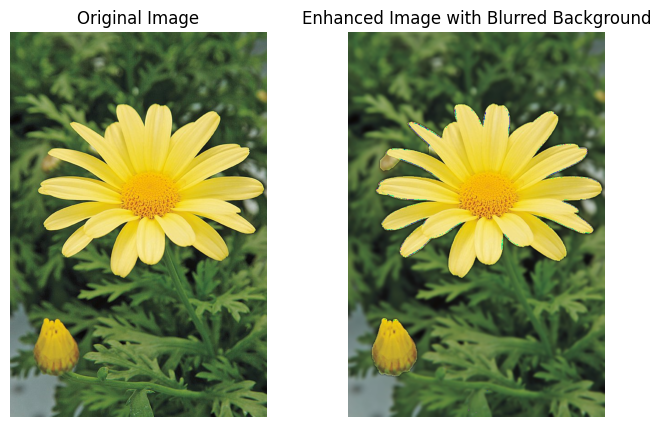

In [ ]:


plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Enhanced Image with Blurred Background')
plt.imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
